In [4]:
from __future__ import print_function


import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import hy_param

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [6]:
# Pointing the model checkpoint
checkpoint_file = tf.train.latest_checkpoint(os.path.join(hy_param.checkpoint_dir, 'checkpoints'))
saver = tf.train.import_meta_graph("{}.meta".format(checkpoint_file))

In [17]:
# Loading test data
test_data = np.array([mnist.test.images[100]])

In [23]:

input_x = tf.get_default_graph().get_operation_by_name("input_x").outputs[0]

In [19]:
# Loading Prediction operation
prediction = tf.get_default_graph().get_operation_by_name("prediction").outputs[0]

In [22]:
with tf.Session() as sess:
    
    saver.restore(sess, checkpoint_file)
    
    data = sess.run(prediction, feed_dict={input_x: test_data })
    
    print("Predicted digit: ", data.argmax() )

INFO:tensorflow:Restoring parameters from /home/varunkn/Chapter 2/runs/checkpoints/model-100
Predicted digit:  6


Input image:


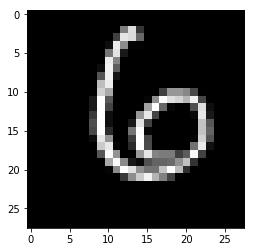

In [21]:
# Display the feed image
print ("Input image:")
plt.gray()
plt.imshow(test_data.reshape([28,28]))